# Diabetes_Prediction_Model


### Importing Libraries

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix, precision_score, recall_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

### Loading and Exploring dataset

In [179]:
data= pd.read_csv('health_care_diabetes.csv')

In [180]:
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [181]:
data.shape

(768, 9)

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [183]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Replacing incompatible values

In [184]:
columns_to_replace = ['Glucose','BloodPressure' , 'SkinThickness','Insulin' , 'BMI']   


In [185]:
Null_percent=(data[columns_to_replace]==0).mean()*100
print('% of null values before null replacement:\n',Null_percent)

% of null values before null replacement:
 Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
BMI               1.432292
dtype: float64


In [186]:
# Replace zeros with NaN in the specified columns
data[columns_to_replace] = data[columns_to_replace].replace(0, np.nan)

# Calculate the mean values for the specified columns
mean_values = data[columns_to_replace].mean()

# Replace NaN values with mean values in the specified columns
data[columns_to_replace] = data[columns_to_replace].fillna(mean_values)

# Confirm that zeros are replaced with mean values
print(data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [187]:
Null_percent=(data[columns_to_replace]==0).mean()*100
print('% of null values after null replacement:\n',Null_percent)

% of null values after null replacement:
 Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
BMI              0.0
dtype: float64


In [188]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


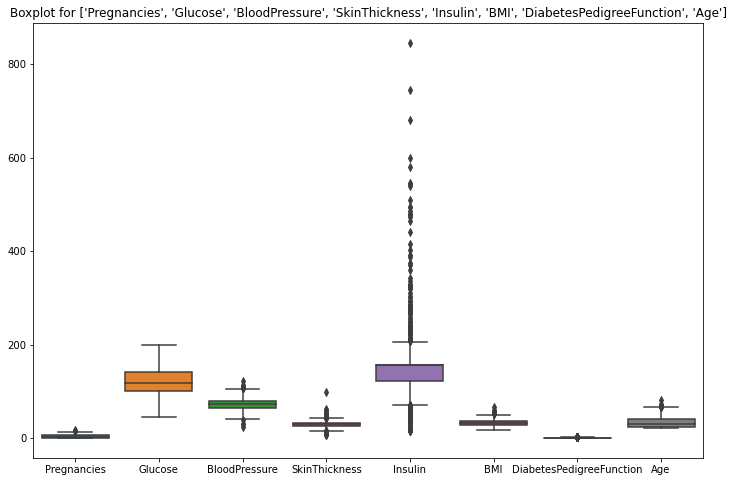

In [189]:
# Numerical columns where you want to detect outliers
numerical_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Selecting the specified numerical columns from the dataset
columns = data[numerical_columns]

# Boxplots to visualize outliers
plt.figure(figsize=(12, 8))   
sns.boxplot(data=columns)
plt.title(f'Boxplot for {numerical_columns}')  
plt.show()


In [190]:
# Finding the Outlier Count in the selected Columns:

def find_outliers_iqr(data, column_name):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the Lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

    # Count the number of outliers
    count_outliers = len(outliers)

    return count_outliers

# Calculate and print the number of outliers for each column of interest
 
for column_name in numerical_columns:
    outlier_count = find_outliers_iqr(data, column_name)
    print(f"Number of outliers in the '{column_name}' column: {outlier_count}")


Number of outliers in the 'Pregnancies' column: 4
Number of outliers in the 'Glucose' column: 0
Number of outliers in the 'BloodPressure' column: 14
Number of outliers in the 'SkinThickness' column: 87
Number of outliers in the 'Insulin' column: 164
Number of outliers in the 'BMI' column: 8
Number of outliers in the 'DiabetesPedigreeFunction' column: 29
Number of outliers in the 'Age' column: 9


### Inference

<p> Outlier Count Summary:<br>
The summary indicates that the columns 'Insulin,' 'SkinThickness,' and 'DiabetesPedigreeFunction' have a higher number of outliers compared to other columns.<br>
Specifically, 'SkinThickness' has 87 outliers, 'Insulin' has 164 outliers, and 'DiabetesPedigreeFunction' has 29 outliers.<p>

### Treating Outliers

In [191]:
 sorted(data)
Q1 = data.quantile(0.20)
Q3 = data.quantile(0.80)
IQR = Q3 - Q1
print(IQR)



Pregnancies                  6.000000
Glucose                     52.000000
BloodPressure               20.000000
SkinThickness               12.000000
Insulin                     50.548223
BMI                         11.600000
DiabetesPedigreeFunction     0.467600
Age                         19.600000
Outcome                      1.000000
dtype: float64


In [192]:
data_cleared_iqr = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data_cleared_iqr.shape)
print(data.shape)


(670, 9)
(768, 9)


In [193]:
data_cleared_iqr.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,29.15342,155.548223,25.6,0.201,30,0


In [194]:
col=data_cleared_iqr[['Glucose','BloodPressure','SkinThickness','Insulin']]

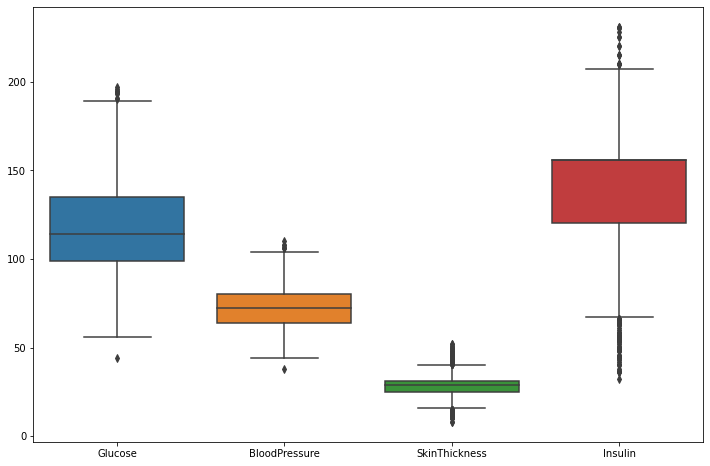

In [195]:
#observing outlier treatment
plt.figure(figsize=(12,8))
sns.boxplot(data=col)
plt.show()


### Inference

<p> <b>Outlier Treatment:</b>
<br>
<li>To treat outliers, the data is sorted, and the first and third quartiles (Q1 and Q3) are calculated.</li>
<li>The interquartile range (IQR) is then computed for each column.</li>
<li>The outliers are removed by keeping only the data points that fall within the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR].</li>
<li>The resulting dataset (data_cleared_iqr) has a reduced number of outliers and is printed with its shape.</li>
<li>The original dataset (data) has 768 rows and 9 columns, while the cleaned dataset has 670 rows after outlier removal</li>
<br><b>Outlier Treatment Summary:</b>

Outliers have been effectively treated using the IQR method, resulting in a reduced dataset (data_cleared_iqr) with 670 rows.</p>

### EDA - Univariate analysis for  each features

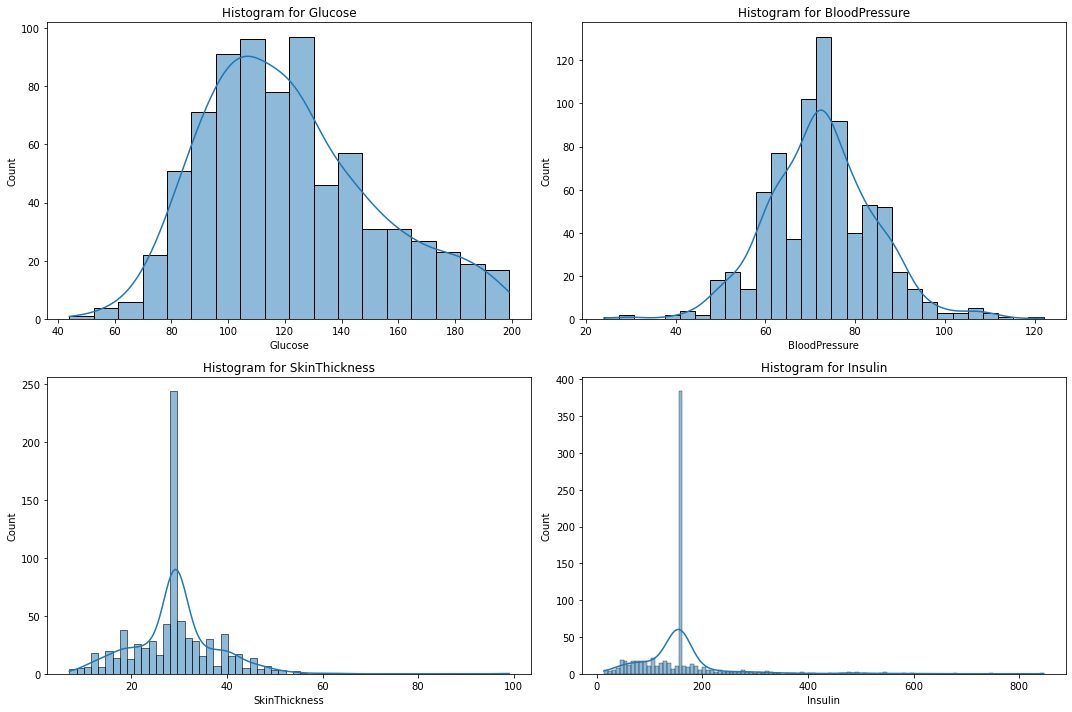

In [196]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, column in enumerate(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']):
    sns.histplot(data[column], ax=axes[i // 2, i % 2], kde=True)
    axes[i // 2, i % 2].set_title(f'Histogram for {column}')

plt.tight_layout()
plt.show()

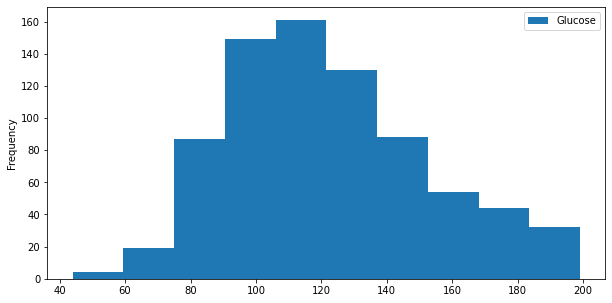

In [197]:
data['Glucose'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

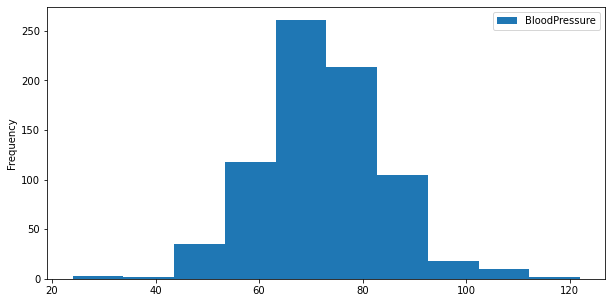

In [198]:
data['BloodPressure'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

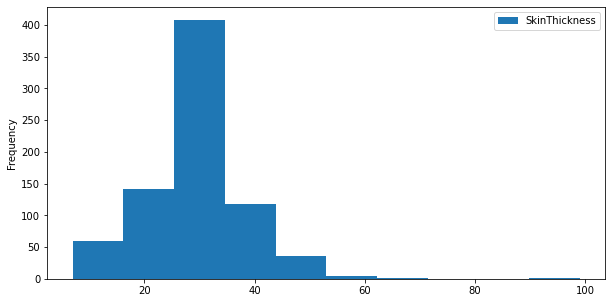

In [199]:
data['SkinThickness'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

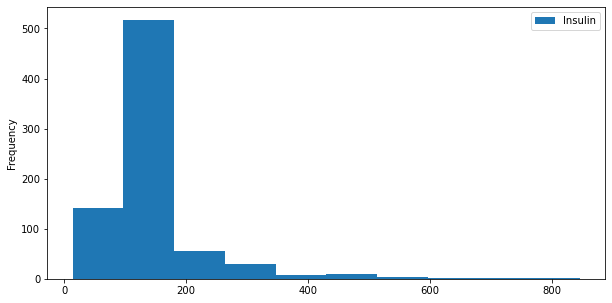

In [200]:
data['Insulin'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

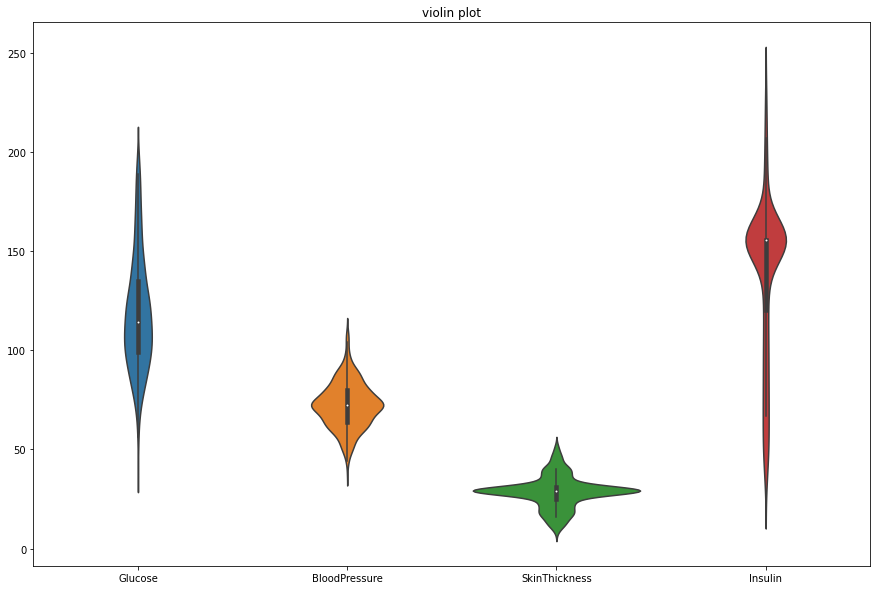

In [201]:
col=data_cleared_iqr[['Glucose','BloodPressure','SkinThickness','Insulin']]
plt.figure(figsize=(15,10))
sns.violinplot(data=col)
plt.title("violin plot")
plt.show()

<p> <b> Violin Plot </b> <br> 
This violin plot shows the distribution of the Glucose , BloodPressure , SkinThickness and Inslulin .<br>
The Violin shape represent the probability density function (PDF) of these four variables.<br>
    The Box Plot inside the violin the show the median ,Inter Quartile Range (IQR),and Outlier.</p>

### KDE_Kenrel Density Estimation

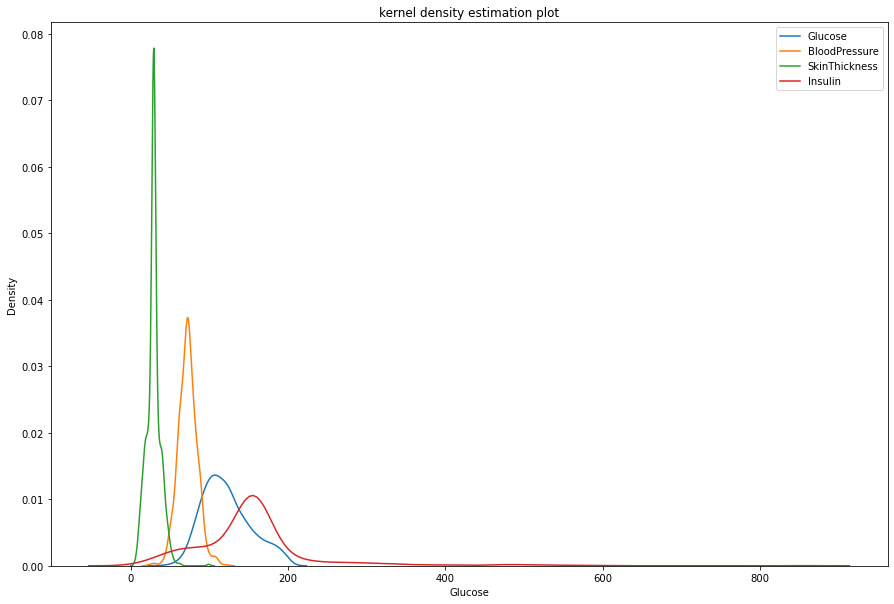

In [202]:
plt.figure(figsize=(15,10))
for column in col:
    sns.kdeplot(data[column],label=column)
plt.title("kernel density estimation plot")
plt.legend()
plt.show()

###### This KDE plot shows the estimated PDF of each features wich can be usedt to visualise the distribution of data.This is a non- parametric method to find the pdf of a randomn variable

### Creating Frequency plot describing the data types and the count of variable

In [203]:
data.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [204]:
data.dtypes.value_counts()

float64    6
int64      3
dtype: int64

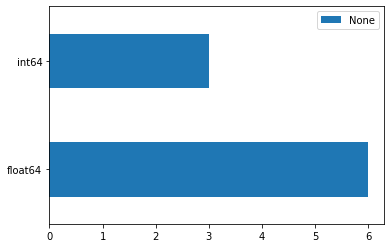

In [205]:
figsize=(16,2)
data.dtypes.value_counts().plot(kind='barh')
plt.legend()
plt.show()

<b> Observations </b> 
<li>The dataset contains variables with two main data types: float64 and int64.</li>
<li>The data type distribution is as follows:</li>
<li>Float64: 6 variables (Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction)</li>
<li>Int64: 3 variables (Pregnancies, Age, Outcome)</li>
<li>The majority of the variables in the dataset are of type float64.</li>
<li>This suggests that a significant portion of the dataset consists of continuous numerical data.The presence of int64 variables indicates discrete numerical data, with 'Pregnancies,' 'Age,' and 'Outcome' being integer-valued variables</li>

### Data Exploration:

###### checking the balance of data

In [206]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

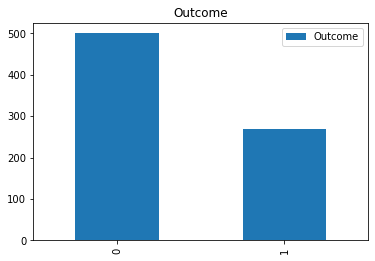

In [207]:
figsize=(16,2)
data['Outcome'].value_counts().plot(kind='bar')
plt.title('Outcome')
plt.legend()
plt.show()

In [208]:
outcome=(data['Outcome'].value_counts()/data['Outcome'].shape)*100
outcome

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [209]:
balanced_data=100-outcome
balanced_data

0    34.895833
1    65.104167
Name: Outcome, dtype: float64

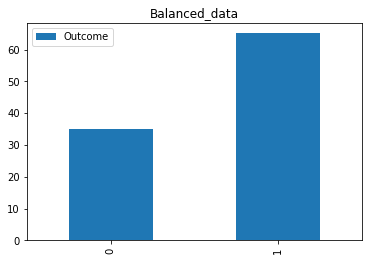

In [210]:
balanced_data.plot(kind='bar')
plt.legend()
plt.title('Balanced_data')
plt.show()

<p> <b>Observation</b> 
    <li>The 'Outcome' variable in the dataset represents a binary classification task, where 0 typically indicates the absence of condition, and 1 indicates the presence of the condition.</li>
<p><li>The class distribution is as follows:
Class 0: 500 instances
     and Class 1: 268 instance</li></p>
    <li> In summary, the analysis indicates an imbalanced dataset, with Class 0 being the majority class and Class 1 being the minority class.</li>

### Bivariate Analysis

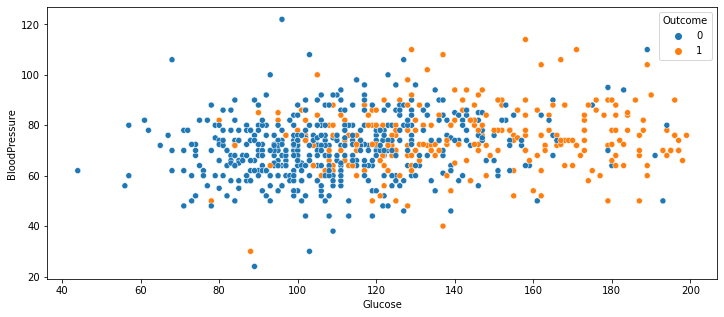

In [211]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Glucose',y='BloodPressure',hue='Outcome',data=data)
plt.show()

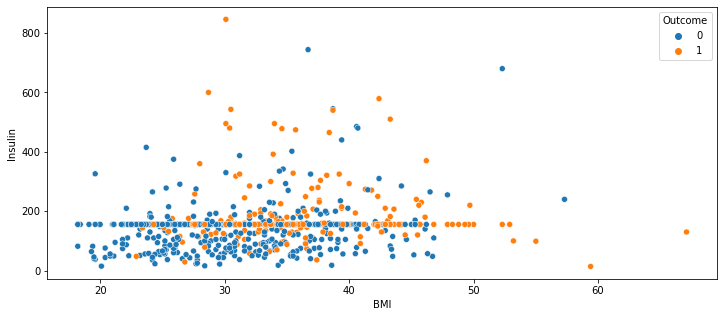

In [212]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='BMI',y='Insulin',hue='Outcome',data=data)
plt.show()

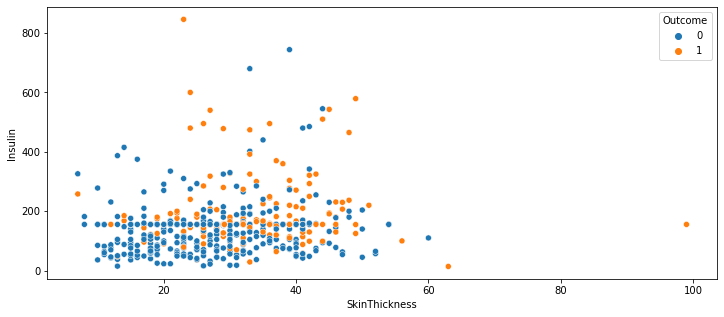

In [213]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='SkinThickness',y='Insulin',hue='Outcome',data=data)
plt.show()

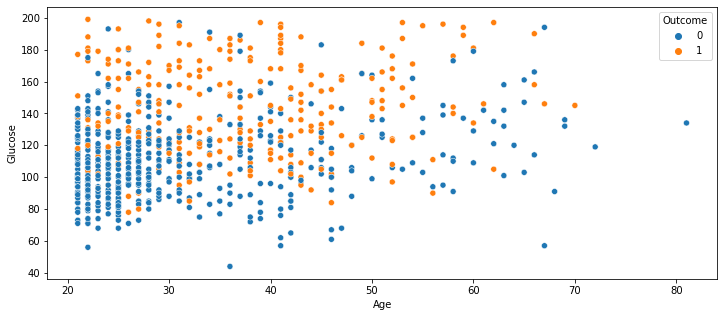

In [214]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Age',y='Glucose',hue='Outcome',data=data)
plt.show()

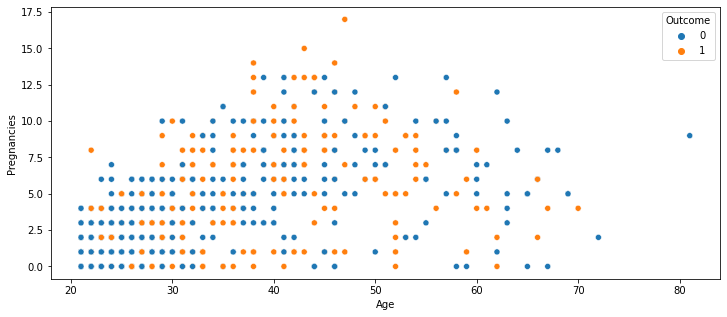

In [215]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Age',y='Pregnancies',hue='Outcome',data=data)
plt.show()

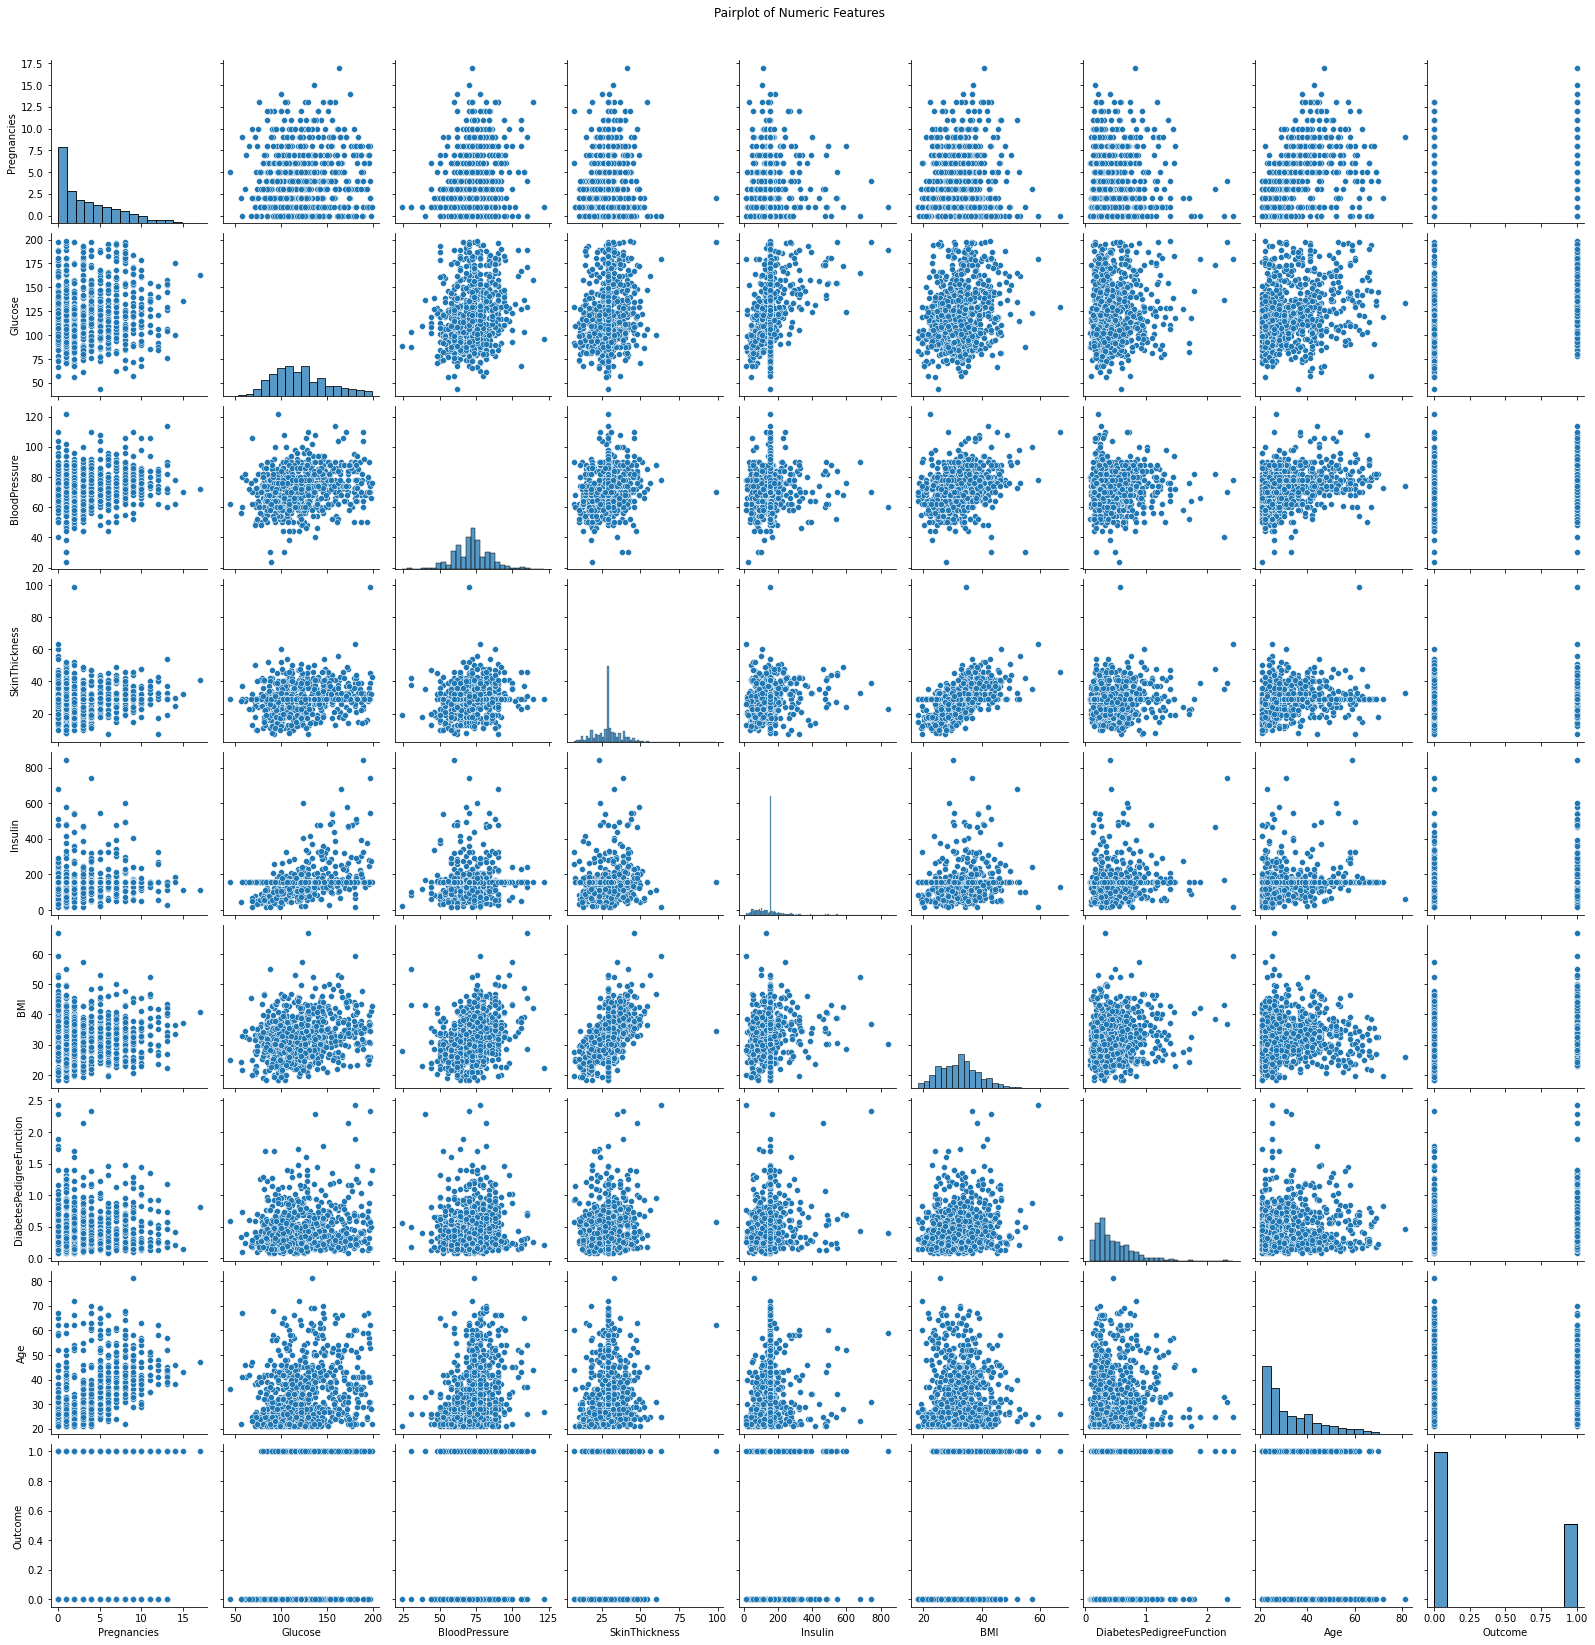

In [216]:
sns.pairplot(data)
plt.suptitle('Pairplot of Numeric Features',y=1.02)
plt.show()

### Multivariate Analysis

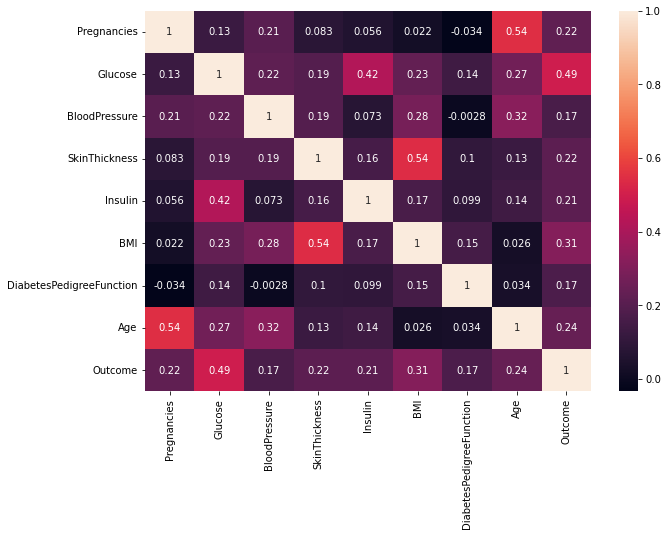

In [217]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

<p> <b> <li>we can see that outcome has maximum relation with Glucose  with any other and , and minimum relation with blood pressure.</li><br><li> And this glucose is highly in relation with Insulin level , mining deeper the insuli level is also highly corelated with the Glucose level only ! .</li><br><li> so that we could infer that features Glucose and the Insulin plays a major role inthe the diesease outcome</li></b></p>

### Feature selection

In [218]:
x=data.drop(['Outcome'],axis=1)
y=data.Outcome

In [219]:
data.corrwith(data['Outcome'])

Pregnancies                 0.221898
Glucose                     0.492928
BloodPressure               0.166074
SkinThickness               0.215299
Insulin                     0.214411
BMI                         0.311924
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
dtype: float64

In [220]:
bestfeatures = SelectKBest(score_func=chi2, k='all') 
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_) 
dfcolumns = pd.DataFrame(x.columns) 
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1) 
featureScores.columns = ['Specs','Score'] #naming the dataframe columns 
print(featureScores.nlargest(8,'Score')) #print 10 best features

                      Specs        Score
4                   Insulin  1638.618150
1                   Glucose  1418.705030
7                       Age   181.303689
0               Pregnancies   111.519691
5                       BMI   108.678584
3             SkinThickness    94.245703
2             BloodPressure    42.749956
6  DiabetesPedigreeFunction     5.392682


In [221]:
new_x=data.drop(['Outcome','BloodPressure'],axis=1).values
new_y=data.Outcome.values

<p> <h3>Data is imbalanced
        -For balancing the data we wil use <b>SMOTE</b> over sampling techinque</h3></p>

## Train a model


In [222]:
# Train-Test Split for Data Modeling
from sklearn.model_selection import train_test_split

trainx, testx, trainy, testy = train_test_split(new_x, new_y, test_size=0.20, random_state=10)

print("Before Oversampling, counts of label '1': {}".format(sum(trainy == 1)))
print("Before Oversampling, counts of label '0': {}".format(sum(trainy == 0)))

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=63)
trainx_res, trainy_res = sm.fit_resample(trainx, trainy.ravel())

print("After Oversampling, the shape of train X: {}".format(trainx_res.shape))
print("After Oversampling, the shape of train_y: {}".format(trainy_res.shape))

print("After Oversampling, counts of label '1': {}".format(sum(trainy_res == 1)))
print("After Oversampling, counts of label '0': {}".format(sum(trainy_res == 0)))


Before Oversampling, counts of label '1': 209
Before Oversampling, counts of label '0': 405
After Oversampling, the shape of train X: (810, 7)
After Oversampling, the shape of train_y: (810,)
After Oversampling, counts of label '1': 405
After Oversampling, counts of label '0': 405


## Building Models


<h3>Model1: Logistic Regression Model</h3>

In [223]:
# Create a Logistic Regression model
logreg = LogisticRegression(solver='liblinear', random_state=123)

# Train the model on the oversampled data
logreg.fit(trainx_res, trainy_res)

# Make predictions on the test set
prediction = logreg.predict(testx)

# Evaluate the model
accuracy = accuracy_score(testy, prediction)
mse = mean_squared_error(testy, prediction)

print('Accuracy Score:', accuracy)
print('Mean Squared Error:', mse)

# Confusion Matrix
conf_matrix = confusion_matrix(testy, prediction)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
class_report = classification_report(testy, prediction)
print('Classification Report:')
print(class_report)

Accuracy Score: 0.7272727272727273
Mean Squared Error: 0.2727272727272727
Confusion Matrix:
[[69 26]
 [16 43]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.73      0.77        95
           1       0.62      0.73      0.67        59

    accuracy                           0.73       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.74      0.73      0.73       154



AUC: 0.838


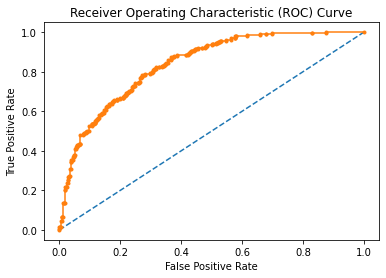

In [224]:
from sklearn.metrics import roc_curve, roc_auc_score

# predict probabilities
probs = logreg.predict_proba(trainx_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(trainy_res, probs)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

### Model 2: Random Forest Classifier

In [225]:
rf = RandomForestClassifier(random_state=42, max_depth=5)

# Train the model
rf.fit(trainx_res, trainy_res)

# Make predictions on the test set
rf_predict = rf.predict(testx)

# Evaluate the model
accuracy_rf = accuracy_score(testy, rf_predict)
mse_rf = mean_squared_error(testy, rf_predict)

print('Random Forest Classifier:')
print('Accuracy Score:', accuracy_rf)
print('Mean Squared Error:', mse_rf)






Random Forest Classifier:
Accuracy Score: 0.7662337662337663
Mean Squared Error: 0.23376623376623376


In [226]:
# Random Forest Classifier Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                    param_grid=param_grid,
                    n_jobs=1,  # Set to 1 for sequential execution
                    cv=5,
                    verbose=2)

grid.fit(trainx_res, trainy_res)
print('Best Parameters:', grid.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 

In [227]:
rf_best = RandomForestClassifier(**grid.best_params_, random_state=42)
rf_best.fit(trainx_res, trainy_res)

# Make predictions on the test set
rf_grid_predict = rf_best.predict(testx)

# Evaluate the model
accuracy_rf_grid = accuracy_score(testy, rf_grid_predict)
mse_rf_grid = mean_squared_error(testy, rf_grid_predict)

print('Random Forest Classifier (Best Parameters):')
print('Accuracy Score:', accuracy_rf_grid)
print('Mean Squared Error:', mse_rf_grid)

# Confusion Matrix and Classification Report
conf_matrix_rf_grid = confusion_matrix(testy, rf_grid_predict)
class_report_rf_grid = classification_report(testy, rf_grid_predict)

print('Confusion Matrix:')
print(conf_matrix_rf_grid)

print('Classification Report:')
print(class_report_rf_grid)

Random Forest Classifier (Best Parameters):
Accuracy Score: 0.7597402597402597
Mean Squared Error: 0.24025974025974026
Confusion Matrix:
[[69 26]
 [11 48]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        95
           1       0.65      0.81      0.72        59

    accuracy                           0.76       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.78      0.76      0.76       154



AUC: 0.940


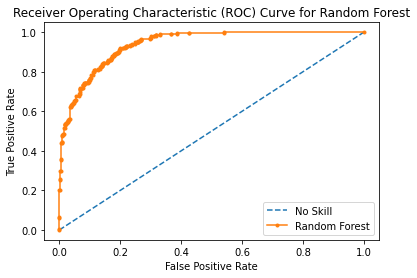

In [228]:
# Predict probabilities using the trained Random Forest model
probs_rf = rf.predict_proba(trainx_res)
# Keep probabilities for the positive outcome only
probs_rf = probs_rf[:, 1]

# Calculate AUC
auc_rf = roc_auc_score(trainy_res, probs_rf)
print('AUC: %.3f' % auc_rf)

# Calculate ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(trainy_res, probs_rf)

# Plot the no-skill line
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')

# Plot the ROC curve for the model
plt.plot(fpr_rf, tpr_rf, marker='.', label='Random Forest')

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend()
plt.show()

In [229]:
pip install --upgrade scikit-learn joblib


Note: you may need to restart the kernel to use updated packages.


### Model 3 : DecisionTreeClassifier

Decision Tree Classifier (with Feature Engineering):
Accuracy Score: 0.7207792207792207
mean_squared_error: 0.34415584415584416


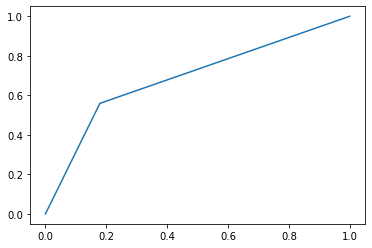

In [230]:
dc = DecisionTreeClassifier(random_state=42)
dc.fit(trainx, trainy)
# Evaluate the model
prediction_dc = dc.predict(testx)
accuracy_dc = accuracy_score(testy, prediction_dc)
print('Decision Tree Classifier (with Feature Engineering):')
print('Accuracy Score:', accuracy_dc)
mse_dc = mean_squared_error(testy, dc_pred)
print("mean_squared_error:",mse_dc)
probs_dc = dc.predict_proba(testx)[:, 1]
fpr_dc, tpr_dc, thresholds_dc = roc_curve(testy, probs_dc)
plt.plot(fpr_dc, tpr_dc, label='Decision Tree')

### Model 4: KNN

In [231]:
# Fit the KNN model to the training data
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(trainx_res, trainy_res)

# Make predictions on the test set
knn_pred = knn.predict(testx)

# Evaluate the model
accuracy_knn = accuracy_score(testy, knn_pred)
mse_knn = mean_squared_error(testy, knn_pred)

print('KNN Classifier:')
print('Accuracy Score:', accuracy_knn)
print('Mean Squared Error:', mse_knn)
print('Confusion Matrix:\n', confusion_matrix(testy, knn_pred))
print('Classification Report:\n', classification_report(testy, knn_pred))

KNN Classifier:
Accuracy Score: 0.6493506493506493
Mean Squared Error: 0.35064935064935066
Confusion Matrix:
 [[76 19]
 [35 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.80      0.74        95
           1       0.56      0.41      0.47        59

    accuracy                           0.65       154
   macro avg       0.62      0.60      0.60       154
weighted avg       0.64      0.65      0.64       154



AUC: 0.951


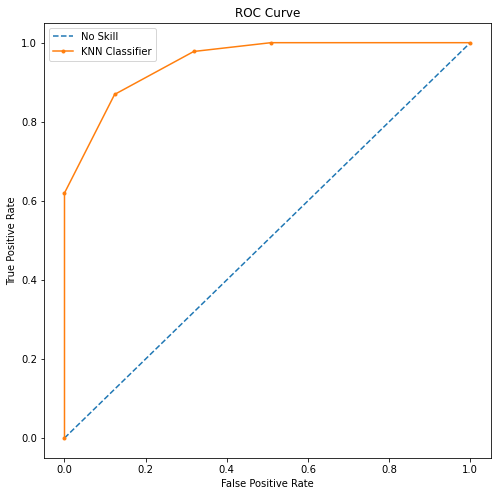

In [232]:
# Preparing ROC Curve
probs_knn = knn.predict_proba(trainx_res)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(trainy_res, probs_knn)

# Calculate AUC
auc_knn = roc_auc_score(trainy_res, probs_knn)
print('AUC: %.3f' % auc_knn)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.plot(fpr_knn, tpr_knn, marker='.', label='KNN Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Model 5 : SVM

In [233]:
# Create an SVM model
svm_model = SVC(kernel='linear', C=1, random_state=42)

# Train the model
svm_model.fit(trainx, trainy)

# Evaluate the model
prediction_svm = svm_model.predict(testx)
accuracy_svm = accuracy_score(testy, prediction_svm)
mse_svm = mean_squared_error(testy,prediction_svm )
print('SVM Classifier:')
print('Accuracy Score:', accuracy_svm)
print('Mean_squared_error:',mse_svm )


SVM Classifier:
Accuracy Score: 0.7467532467532467
Mean_squared_error: 0.2532467532467532


### Model accuracy comparision

In [234]:
# Creating the objects
logreg_cv = LogisticRegression(solver='liblinear', random_state=123)
dt_cv = DecisionTreeClassifier(random_state=123)
knn_cv = KNeighborsClassifier()
rf_cv = RandomForestClassifier(random_state=123)
svm_cv = SVC(kernel='linear', C=1, random_state=42)

# Dictionary mapping model indices to names
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'KNN', 3: 'Random Forest',4: 'SVM'}

# List of models
cv_models = [logreg_cv, dt_cv, knn_cv, rf_cv,svm_cv]

# Loop through models and print test accuracy
for i, model in enumerate(cv_models):
    accuracy = cross_val_score(model, trainx, trainy, cv=5, scoring='accuracy').mean()
    print(f'Test Accuracy for {cv_dict[i]}: {accuracy}')

Test Accuracy for Logistic Regression: 0.7752898840463814
Test Accuracy for Decision Tree: 0.7051712648274024
Test Accuracy for KNN: 0.7198987071837932
Test Accuracy for Random Forest: 0.759016393442623
Test Accuracy for SVM: 0.7785685725709717


<h3>Model Inferences</h3>

<p>
    <b>SVM (Support Vector Machine):</b>
    <ul>
        <li>SVM achieved a relatively high accuracy of approximately 77.86%, making it one of the top-performing models.</li>
        <li>SVM is known for its effectiveness in handling complex decision boundaries, and it seems to have captured the patterns in your data well.</li>
    </ul>
</p>

<p>
    <b>Logistic Regression:</b>
    <ul>
        <li>Logistic Regression also performed well, with a test accuracy of around 77.53%.</li>
        <li>Logistic Regression is a good baseline model for binary classification tasks and can provide interpretable results.</li>
    </ul>
</p>

<p>
    <b>Random Forest:</b>
    <ul>
        <li>Random Forest achieved a test accuracy of approximately 75.90%, making it a competitive model.</li>
        <li>Random Forest is an ensemble model that combines multiple decision trees, providing robustness and reducing overfitting.</li>
    </ul>
</p>

<p>
    <b>KNN (K-Nearest Neighbors):</b>
    <ul>
        <li>KNN achieved a test accuracy of about 71.99%, which is decent but slightly lower than some other models.</li>
        <li>KNN relies on the similarity of data points and may be sensitive to the choice of the number of neighbors (k).</li>
    </ul>
</p>

<p>
    <b>Decision Tree:</b>
    <ul>
        <li>Decision Tree exhibited a test accuracy of around 70.52%, which is the lowest among the models you tested.</li>
        <li>Decision Trees can be prone to overfitting, and hyperparameter tuning may help improve their performance.</li>
    </ul>
</p>

<p>
    <b>Overall:</b>
    <ul>
        <li>SVM and Logistic Regression are the top-performing models in terms of accuracy.</li>
    </ul>
</p>